#### Note: If the code is going to be executed, the cluster labels for K-Means clustering needs to be rechecked at coding line 106.
#### The cluster IDs keep jumbling everytime and I haven't built an auto logic to name the cluster labels in the code.

## 0. Importing the key library packages

### 0.1 Packages related to  data analysis & visualizataion - numpy, pandas, matplotlib & seaborn 

In [1]:
#Importing the key library packages for Data Analysis & Visualizations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import datetime as dt
import re

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
# Set Display Options 
pd.set_option('display.max_columns', 999) # To display all the columns in the dataframe
pd.set_option('display.max_rows', None)
pd.set_option('mode.chained_assignment', None) #to suppress warnings on settingWithCopyWarning
pd.set_option('display.precision',6) #to display the 6 precision
pd.set_option('display.max_colwidth', None) # To display the full contents of the column
pd.set_option('display.float_format', lambda x: '{:,.2f}'.format(x)) 
# (lambda x : "{:,}".format(x))
pd.set_option('display.precision',1)
import warnings
warnings.filterwarnings("ignore")

### 0.2 Packages related PCA and Clustering

In [3]:
# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

# Import the StandardScaler()
from sklearn.preprocessing import StandardScaler

#Improting the PCA module
from sklearn.decomposition import PCA

## 1. Reading and Understanding the Data

In this step we will perform the following activities:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [4]:
#Store the file path in a variable to open the CSV to load into the dataframe.
#This path to be changed while running the evaluation
SalesFilePath = "Sales_Data_FY20_21.csv" 
dfSales = pd.read_csv(SalesFilePath,encoding = 'unicode_escape') #Read the file into the data frame 'utf-8'

#Keep the original dataset under dfSalesOriginal DataFrame for future reference
dfSalesOriginal = pd.read_csv(SalesFilePath,encoding = 'unicode_escape') #Read the file into the data frame

In [5]:
#Review the top 5 contents of the data set dfSales
dfSales.head()

,Material_No,Material_Desc,Inco_Terms,Sold_to_party,Plant,Sales_Order_No,Billing_No,Customer_Group,Billing_Type_Desc,Billing_Date,Billed_Qty,Net_Sales,Prod_Category,Prod_charecteristics
0,B67339,ORACLE JAVA CLOUD SERVICE S2 - HOSTED EN,DDU,roltsds mcsninsuosc ayt,1023,"2,010,124,529.00",6010108577,Resellers(SMB),Invoice-lT/Telco,01/04/2020,1,"2,089.18",Software,Non Physical
1,B81291,NaN,DDU,roltsds mcsninsuosc ayt,1023,"2,010,124,529.00",6010108577,Resellers(SMB),Invoice-lT/Telco,01/04/2020,1,779.60,Software,Non Physical
2,B75365,NaN,DDU,roltsds mcsninsuosc ayt,1023,"2,010,124,529.00",6010108577,Resellers(SMB),Invoice-lT/Telco,01/04/2020,1,"2,444.91",Software,Non Physical
3,B67335,NaN,DDU,roltsds mcsninsuosc ayt,1023,"2,010,124,529.00",6010108577,Resellers(SMB),Invoice-lT/Telco,01/04/2020,1,722.63,Software,Non Physical
4,B67293,NaN,DDU,roltsds mcsninsuosc ayt,1023,"2,010,124,529.00",6010108577,Resellers(SMB),Invoice-lT/Telco,01/04/2020,1,"1,636.74",Software,Non Physical


### Study the data structure of the Dataset 

#### Analyze the shape of the Data Frame Sales

In [6]:
dfSales.shape

(243165, 14)

#### Key Observation(s): Total 243165 sales transactions with 14 columns

### Analyze the data structure information about the data frame Sales

In [7]:
dfSales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243165 entries, 0 to 243164
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Material_No           243165 non-null  object 
 1   Material_Desc         195252 non-null  object 
 2   Inco_Terms            156877 non-null  object 
 3   Sold_to_party         243165 non-null  object 
 4   Plant                 243165 non-null  int64  
 5   Sales_Order_No        243119 non-null  float64
 6   Billing_No            243165 non-null  int64  
 7   Customer_Group        243165 non-null  object 
 8   Billing_Type_Desc     243165 non-null  object 
 9   Billing_Date          243165 non-null  object 
 10  Billed_Qty            243165 non-null  int64  
 11  Net_Sales             243165 non-null  float64
 12  Prod_Category         210411 non-null  object 
 13  Prod_charecteristics  210411 non-null  object 
dtypes: float64(2), int64(3), object(9)
memory usage: 26.

#### Key Observation(s): There are 9 object columns, 3 integer columns and 2 float columns with non-null values. 

### Change the Datatype of the columns

In [8]:
# Convert Billing_Date to DateTime data type 
dfSales['Billing_Date']= pd.to_datetime(dfSales['Billing_Date'])

# Convert Plant, Sales_Order_No and Billing_No to object data types 
change_type = {'Plant': object,
                'Sales_Order_No': object,
               'Billing_No': object
               }
dfSales = dfSales.astype(change_type)

### Analyze the data structure information about the data frame Sales

In [9]:
dfSales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243165 entries, 0 to 243164
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Material_No           243165 non-null  object        
 1   Material_Desc         195252 non-null  object        
 2   Inco_Terms            156877 non-null  object        
 3   Sold_to_party         243165 non-null  object        
 4   Plant                 243165 non-null  object        
 5   Sales_Order_No        243119 non-null  object        
 6   Billing_No            243165 non-null  object        
 7   Customer_Group        243165 non-null  object        
 8   Billing_Type_Desc     243165 non-null  object        
 9   Billing_Date          243165 non-null  datetime64[ns]
 10  Billed_Qty            243165 non-null  int64         
 11  Net_Sales             243165 non-null  float64       
 12  Prod_Category         210411 non-null  object        
 13 

#### Key Observation(s): Plant, Sales_Order_No and Billing_Nochanged to object and Billing_Date to Datetime64

### Analyze the Statistical values of the Data Frame sales 

In [10]:
dfSales.describe()

,Billed_Qty,Net_Sales
count,"243,165.00","243,165.00"
mean,236.55,"10,557.81"
std,"9,419.50","46,086.52"
min,"-15,000.00","-850,080.00"
25%,2.00,382.50
50%,9.00,"1,684.48"
75%,40.00,"7,143.80"
max,"1,500,000.00","7,904,300.49"


#### Key Observation(s): 
1. Average Sales is USD 10,557.81
2. Maximum Sales is USD 7,904,300.49
3. There are negative values in Sales value, indicating sales reversals

## 2. Data Preparation

### 2.1 Handle Missing, Duplicate and Unique values 

### Check for any missing values in the Sales DataFrame

In [11]:
dfSales.isnull().sum()

Material_No                 0
Material_Desc           47913
Inco_Terms              86288
Sold_to_party               0
Plant                       0
Sales_Order_No             46
Billing_No                  0
Customer_Group              0
Billing_Type_Desc           0
Billing_Date                0
Billed_Qty                  0
Net_Sales                   0
Prod_Category           32754
Prod_charecteristics    32754
dtype: int64

#### Key Observations(s): Missing values observed in Material_Desc, Inco_Terms, Sales_Order_No, Prod_Category and Prod_characteristics

In [12]:
# Drop Material_Desc and Inco_Terms as they are not relevant to this analysis
dfSales.drop(['Material_Desc', 'Inco_Terms'], axis = 1, inplace = True)

### Analyze for any duplicate rows in the data frame

In [13]:
dfSales.duplicated().sum()

7672

#### Key Observation(s): There are around 7602 rows which are duplicated in the dataset

In [14]:
# Remove the duplicate rows in the dataset Sales
dfSales = dfSales.drop_duplicates(keep='last')
dfSales.shape

(235493, 12)

#### Key Observation(s): 7602 Duplicate records were removed from the Sales Dataframe 

### Analyze for columns having unique value

In [15]:
#checking if any columns having unique value ie only 1 value as it will not add any value to PCA & Clustering
dfUnique =dfSales.nunique()
dfUnique

Material_No              35229
Sold_to_party             2198
Plant                      122
Sales_Order_No           64199
Billing_No               55130
Customer_Group              16
Billing_Type_Desc            8
Billing_Date               705
Billed_Qty                2086
Net_Sales               107358
Prod_Category              139
Prod_charecteristics         2
dtype: int64

#### Key Observation(s): There are no columns having unique single value 

In [16]:
# Analyse the column Category for Physical and Non-Physical
dfSales['Prod_charecteristics'].value_counts()

Physical        166285
Non Physical     38728
Name: Prod_charecteristics, dtype: int64

In [17]:
# Since our focus here is only for Physical items, lets drop all rows other than  "Physical"
dfSales = dfSales[dfSales.Prod_charecteristics=="Physical"]

In [18]:
dfSales['Prod_charecteristics'].value_counts()

Physical    166285
Name: Prod_charecteristics, dtype: int64

### Recheck for Null values

In [19]:
dfSales.isnull().sum()

Material_No              0
Sold_to_party            0
Plant                    0
Sales_Order_No          17
Billing_No               0
Customer_Group           0
Billing_Type_Desc        0
Billing_Date             0
Billed_Qty               0
Net_Sales                0
Prod_Category            0
Prod_charecteristics     0
dtype: int64

In [20]:
# Drop all Null rows - Sales_Order_No
dfSales = dfSales.dropna()

In [21]:
dfSales.isnull().sum()

Material_No             0
Sold_to_party           0
Plant                   0
Sales_Order_No          0
Billing_No              0
Customer_Group          0
Billing_Type_Desc       0
Billing_Date            0
Billed_Qty              0
Net_Sales               0
Prod_Category           0
Prod_charecteristics    0
dtype: int64

### 2.2. Feature Engineering

### Create columns for Month Number, Year & Month Name

In [22]:
# Create a column for the Month Number of Invoice
dfSales['Billing_Month'] = dfSales['Billing_Date'].dt.month

# Creat a column for the Year of Invoice 
dfSales['Billing_Year'] = dfSales['Billing_Date'].dt.year

# Create a column for the Month Name of Invoice 
dfSales['Billing_MonthName'] = dfSales['Billing_Date'].dt.strftime('%b')
dfSales["Bill_Date"] = dfSales["Billing_Date"].dt.date 

In [23]:
dfSales.head()

,Material_No,Sold_to_party,Plant,Sales_Order_No,Billing_No,Customer_Group,Billing_Type_Desc,Billing_Date,Billed_Qty,Net_Sales,Prod_Category,Prod_charecteristics,Billing_Month,Billing_Year,Billing_MonthName,Bill_Date
26,J9773A#ACC,tdergioauinbnd,1021,"7,020,107,907.00",6010108583,Related Party,Intercompany Billing,2020-01-04,2,"2,444.64",Switch,Physical,1,2020,Jan,2020-01-04
29,865414-B21,tdergioauinbnd,1021,"7,020,107,938.00",6010108584,Related Party,Intercompany Billing,2020-01-04,20,"2,630.81",Server Accessories,Physical,1,2020,Jan,2020-01-04
30,826708-B21,tdergioauinbnd,1021,"7,020,107,938.00",6010108584,Related Party,Intercompany Billing,2020-01-04,25,"1,250.00",Server Accessories,Physical,1,2020,Jan,2020-01-04
31,726537-B21,tdergioauinbnd,1021,"7,020,107,938.00",6010108584,Related Party,Intercompany Billing,2020-01-04,25,"1,417.50",Server Accessories,Physical,1,2020,Jan,2020-01-04
38,PVQ-00006,tdergioauinbnd,1001,"7,020,107,941.00",6010108585,Related Party,Intercompany Billing,2020-01-04,22,"20,780.10",Surface Device,Physical,1,2020,Jan,2020-01-04


### Billing_Type_Desc column

In [24]:
# Analyze the Billing_Type_Desc Type 
dfSales['Billing_Type_Desc'].value_counts()

Invoice-lT/Telco        93940
Intercompany Billing    60256
Int Com.Invoice          6066
Cr Memo -IT/Tlc DOA      4804
Incoming Inv-IT/Te        894
Credit Memo-IT/Tlc        302
Invoice Consignment         6
Name: Billing_Type_Desc, dtype: int64

In [25]:
# Replace the values of Sales Invoice Type for ease of understanding. 

dfSales["Billing_Type_Desc"].replace({"Invoice-lT/Telco": "Sales", "Incoming Inv-IT/Te": "Sales", 
                                      "Invoice Consignment":"Sales", "Service Inv-IT/Telco": "Sales",
                                      "Intercompany Billing": "Inter Company", "Int Com.Invoice": "Inter Company",
                                      "Cr Memo -IT/Tlc DOA":"Sales Returns", "Credit Memo-IT/Tlc":"Sales Returns"}, 
                                     inplace=True)

In [26]:
dfSales['Billing_Type_Desc'].value_counts()

Sales            94840
Inter Company    66322
Sales Returns     5106
Name: Billing_Type_Desc, dtype: int64

In [27]:
# Analyse Billing type wise Sales
dfSalesByBillingType = dfSales.groupby(['Billing_Type_Desc'])['Net_Sales'].sum().sort_values(ascending=False)
dfSalesByBillingType.head(dfSalesByBillingType.shape[0])

Billing_Type_Desc
Sales           1,295,604,817.43
Inter Company     654,312,816.57
Sales Returns     -13,766,915.38
Name: Net_Sales, dtype: float64

### 2.4 Exploratory Data Analysis

### Billing Type wise Sales

<AxesSubplot:title={'center':'Billing Type wise Sales value'}, xlabel='Billing_Type_Desc'>

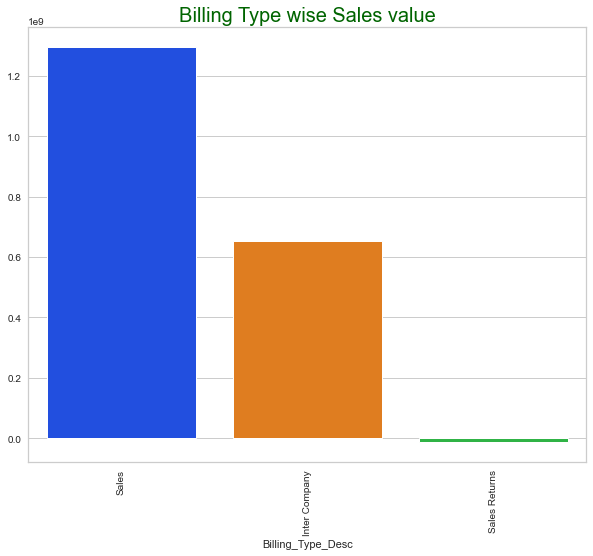

In [28]:
plt.figure(figsize=(10,8))
plt.title("Billing Type wise Sales value", c="darkgreen", size=20)
plt.xticks(rotation=90)
sns.set_theme(style="whitegrid")
sns.barplot(x=dfSalesByBillingType.index, y=dfSalesByBillingType.values, palette='bright')

In [29]:
# For this analysis Customer Sales and Intercompany sales are still sales, so lets club both
dfSales["Billing_Type_Desc"].replace({"Inter Company": "Sales"}, 
                                     inplace=True)
dfSales['Billing_Type_Desc'].value_counts()

Sales            161162
Sales Returns      5106
Name: Billing_Type_Desc, dtype: int64

### Drop rows that contain Sales Returns as they are not relevant for this excercise

In [30]:
dfSales = dfSales[dfSales['Billing_Type_Desc'] != "Sales Returns"]

In [31]:
dfSales['Billing_Type_Desc'].value_counts()

Sales    161162
Name: Billing_Type_Desc, dtype: int64

### Top 20 Product Category by Sales value

In [32]:
dfSalesByTop20ProdCategory = dfSales.groupby(['Prod_Category'])['Net_Sales'].sum().sort_values(ascending=False).head(20)
dfSalesByTop20ProdCategory.head(dfSalesByTop20ProdCategory.shape[0])

Prod_Category
Notebook                 622,967,643.17
Print Supplies           156,795,531.41
Printers                 128,922,174.20
External Hard Drives      82,431,893.63
Tablets                   74,138,901.63
Imac                      72,167,994.88
Desktop PC                71,729,844.73
Air Pods                  71,115,804.42
Surface Device            65,274,191.40
Apple Accessories         54,387,127.54
Networking Accessories    52,924,873.73
Server Accessories        51,643,904.74
Galaxy Watch              42,063,921.98
Apple Ipad (Tablets)      39,271,620.03
All In One PC             34,293,050.49
Flash Drive               34,051,386.95
Mobile Phones             27,581,397.00
Internal Hard Drives      26,956,384.08
Monitors                  23,167,938.65
Ear Pods                  18,835,689.06
Name: Net_Sales, dtype: float64

<AxesSubplot:title={'center':'Top 20 Product Category by Sales Value'}, xlabel='Prod_Category'>

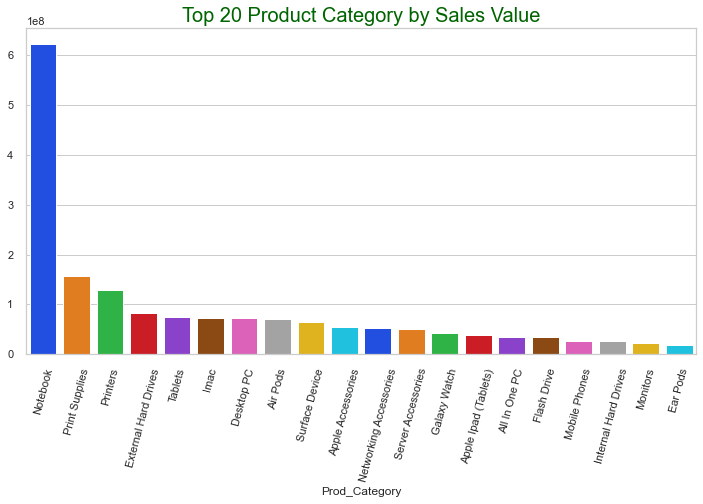

In [33]:
plt.figure(figsize=(12,6))
plt.title("Top 20 Product Category by Sales Value", c="darkgreen", size=20)
plt.xticks(rotation=75)
sns.set_theme(style="whitegrid")
sns.barplot(x=dfSalesByTop20ProdCategory.index, y=dfSalesByTop20ProdCategory.values, palette='bright') 

#### Key Observation(s): Invoice are renamed as "Sales" and Credit Memos are renamed as "Sales Returns"

### 2.5. Derive RFM Values

- R (Recency): Number of days since last purchase
- F (Frequency): Number of tracsactions
- M (Monetary): Total amount of transactions (revenue contributed)

### 2.5.1 Recency: Number of Days since last purchase

#### Choosing a date as a point of reference to evaluate how many days ago was the customer's last purchase. For this purpose take the maximum of Sales Invoice Date from the Sales Dataset and add a day to it to ensure we do not have any zero days in our recency.

In [34]:
dtRecencyBasisDate = dt.datetime.strptime("2022-04-01", "%Y-%m-%d") 
dtRecencyBasisDate = dtRecencyBasisDate.date()
print(dtRecencyBasisDate)

2022-04-01


#### Create a dataframe to get the last purchase date by each customer code

In [35]:
dfLastPurchaseDate = dfSales.groupby(['Prod_Category'])['Bill_Date'].max()

In [36]:
dfLastPurchaseDate.head()

Prod_Category
Access Controller      2022-10-01
Access Reader          2022-10-02
Accessories            2022-12-01
Accessories - Voice    2022-03-31
Air Pods               2022-10-03
Name: Bill_Date, dtype: object

#### Calculate the days since last purchase

In [37]:
Recency = dtRecencyBasisDate - dfLastPurchaseDate
Recency = Recency.astype("str")

def RecencyDays(x):
  return re.findall("\d+", x)[0]

Recency = Recency.apply(RecencyDays)
#Recency = Recency.reset_index()
Recency.head()

Prod_Category
Access Controller      183
Access Reader          184
Accessories            244
Accessories - Voice      1
Air Pods               185
Name: Bill_Date, dtype: object

### 2.5.2 Frequency : Total Number of Purchases

In [38]:
# Frequency of Purchase
dfFrequency = dfSales[['Prod_Category','Sales_Order_No']]
dfFrequency = dfFrequency.drop_duplicates(keep='last') #Remove the duplicates lines of Sales orders to get the unique count
Frequency = dfFrequency.groupby("Prod_Category")["Sales_Order_No"].count()
#Frequency = Frequency.reset_index()
Frequency.head()

Prod_Category
Access Controller       27
Access Reader           12
Accessories            280
Accessories - Voice     10
Air Pods               137
Name: Sales_Order_No, dtype: int64

### 2.5.3 Monetary: Total Dollar Value of Purchases

In [39]:
# Total Purchase value in USD
Monetary = dfSales.groupby("Prod_Category")["Net_Sales"].sum()
#Monetary = Monetary.reset_index()
Monetary.head()

Prod_Category
Access Controller         71,179.47
Access Reader             13,198.69
Accessories            1,126,525.48
Accessories - Voice    1,343,679.20
Air Pods              71,115,804.42
Name: Net_Sales, dtype: float64

In [40]:
Monetary.min(), Monetary.max()

(324.0, 622967643.17)

### Visualize the RFM Distributions by Product Category

#### Recency Distributions by Product Category

<AxesSubplot:title={'center':'Distributions for Recency'}, xlabel='Recency Distributions of Product Category', ylabel='Count'>

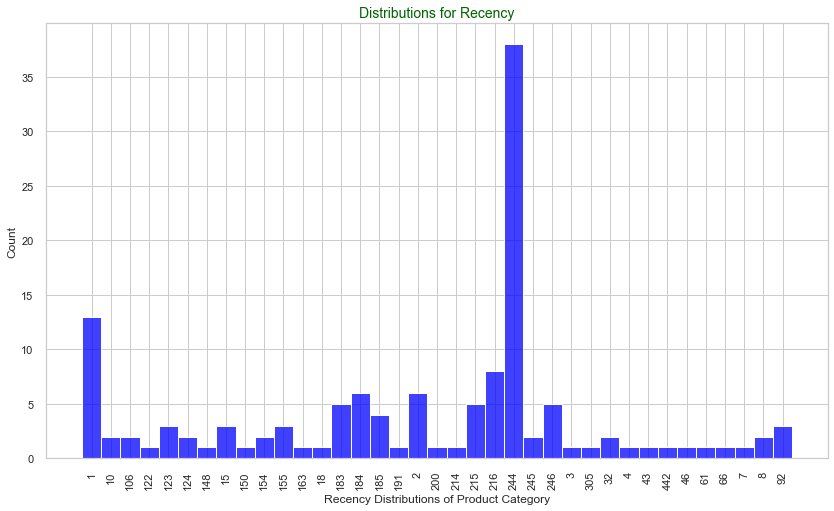

In [41]:
plt.figure(figsize=(14,8))
plt.title("Distributions for Recency", c="DarkGreen", size=14)
plt.xlabel("Recency Distributions of Product Category");
plt.xticks(rotation=90)
# sns.set_theme(style="whitegrid")
#sns.set_style("whitegrid", {'axes.grid' : False})
sns.histplot(Recency.sort_values().values, color="blue")

#### Frequency Distributions by Product Category

<AxesSubplot:title={'center':'Distributions for Frequency'}, xlabel='Frequency Distribution of Product Category', ylabel='Count'>

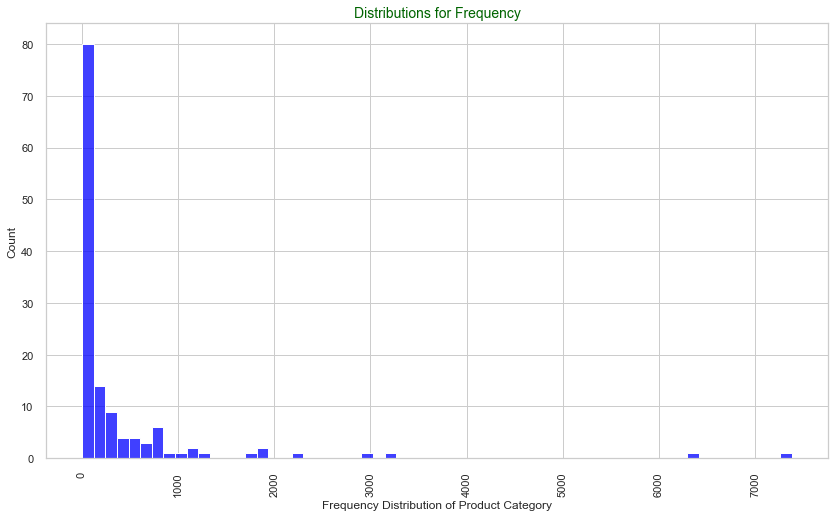

In [42]:
plt.figure(figsize=(14,8))
plt.title("Distributions for Frequency", c="DarkGreen", size=14)
plt.xlabel("Frequency Distribution of Product Category");
plt.xticks(rotation=90)
# sns.set_theme(style="whitegrid")
sns.set_style("whitegrid", {'axes.grid' : False})
# sns.set_theme(style="whitegrid")
sns.histplot(Frequency, color="blue")

#### Monetary Distributions by Product Category

<AxesSubplot:title={'center':'Distributions for Monetary'}, xlabel='Monetary Distribution of Product Category', ylabel='Count'>

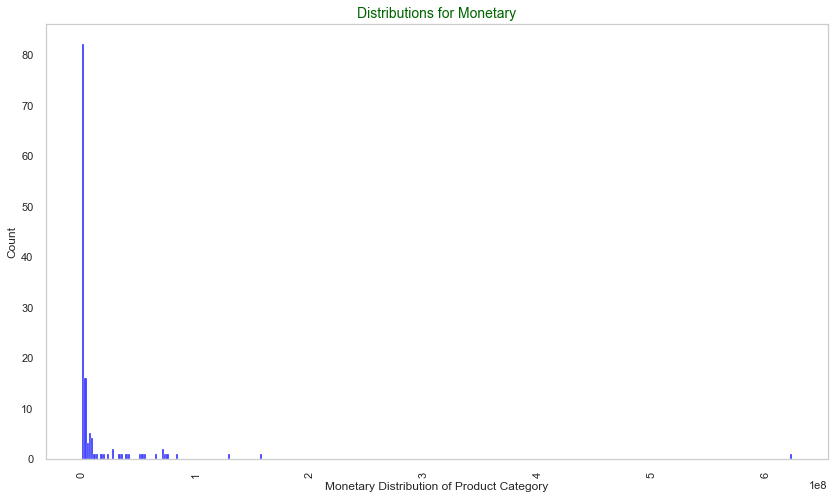

In [43]:
plt.figure(figsize=(14,8))
plt.title("Distributions for Monetary", c="DarkGreen", size=14)
plt.xlabel("Monetary Distribution of Product Category");
plt.xticks(rotation=90)
# sns.set_theme(style="whitegrid")
sns.set_style("whitegrid", {'axes.grid' : False})
sns.histplot(Monetary, color="blue")

### Creating the RFM Matrix for the Product Categories

In [44]:
dfRFM = pd.concat([Recency, Frequency, Monetary], axis=1)
dfRFM.head()

,Bill_Date,Sales_Order_No,Net_Sales
Prod_Category,,,
Access Controller,183,27,"71,179.47"
Access Reader,184,12,"13,198.69"
Accessories,244,280,"1,126,525.48"
Accessories - Voice,1,10,"1,343,679.20"
Air Pods,185,137,"71,115,804.42"


#### Rename the columns to Recency, Frequency & Monetary

In [45]:
dfRFM = dfRFM.rename(columns={"Bill_Date":"Recency", 
                              "Sales_Order_No":"Frequency", "Net_Sales":"Monetary"})
dfRFM["Recency"] = dfRFM["Recency"].astype("int")

In [46]:
dfRFM.head()

,Recency,Frequency,Monetary
Prod_Category,,,
Access Controller,183,27,"71,179.47"
Access Reader,184,12,"13,198.69"
Accessories,244,280,"1,126,525.48"
Accessories - Voice,1,10,"1,343,679.20"
Air Pods,185,137,"71,115,804.42"


### Check for Outliers

<AxesSubplot:xlabel='Monetary'>

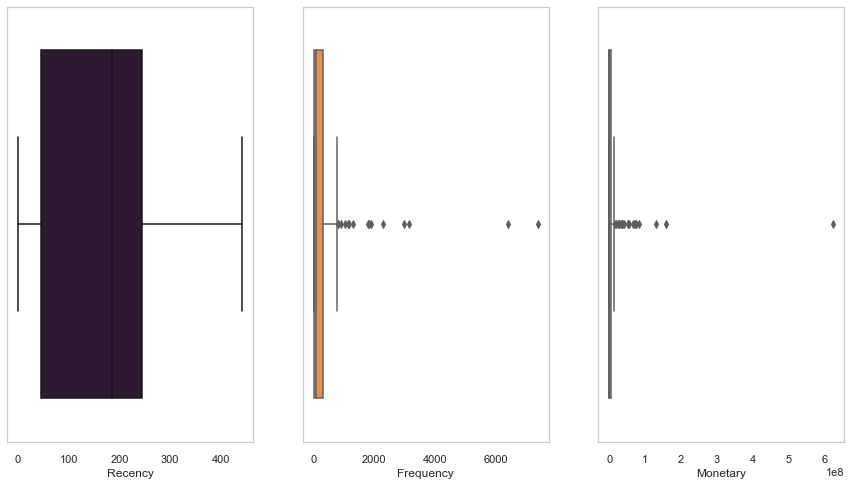

In [47]:
# Visualize the spread using boxplot
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,8))
sns.boxplot(dfRFM['Recency'], orient="v", palette="twilight", ax=ax[0])
sns.boxplot(dfRFM['Frequency'],  orient="v", palette="Oranges", ax=ax[1])
sns.boxplot(dfRFM['Monetary'],  orient="v", palette="Greens", ax=ax[2])

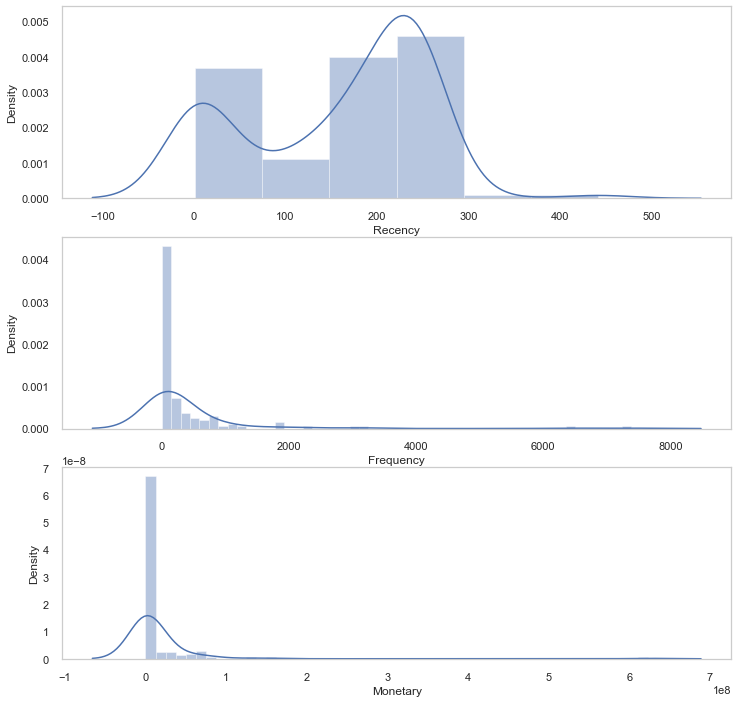

In [48]:
# Plot RFM distributions
plt.figure(figsize=(12,12))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(dfRFM['Recency'])
# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(dfRFM['Frequency'])
# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(dfRFM['Monetary'])
# Show the plot
plt.show()

#### From the spread it is clear the data is skewed and from the boxplot outliers are observed in the Frequency and Monetary plots. 
#### But this is the nature of the business and Clustering models can handle the outliers and hence, the outliers are not handled.

In general we can use the below methods for Outlier removal. But we are not doing this in this case.
#### outliers for Recency
lower_bound = dfRFM.Recency.mean() - 3*dfRFM.Recency.std()
upper_bound = dfRFM.Recency.mean() + 3*dfRFM.Recency.std()
dfRFM = dfRFM[(dfRFM.Recency >= lower_bound) & (dfRFM.Recency <= upper_bound)]

#### outlier treatment for frequency (IQR Method)
Q1 = dfRFM.Frequency.quantile(0.05)
Q3 = dfRFM.Frequency.quantile(0.95)
IQR = Q3 - Q1
dfRFM = dfRFM[(dfRFM.Frequency >= Q1 - 1.5*IQR) & (dfRFM.Frequency <= Q3 + 1.5*IQR)]

#### outlier treatment for Monetary (IQR Method)
Q1 = dfRFM.Monetary.quantile(0.05)
Q3 = dfRFM.Monetary.quantile(0.95)
IQR = Q3 - Q1
dfRFM = dfRFM[(dfRFM.Monetary >= Q1 - 1.5*IQR) & (dfRFM.Monetary <= Q3 + 1.5*IQR)]

#### Analyze the Correlations between the Recency, Frequency & Monetary in the dfModelRFM Dataset

<AxesSubplot:>

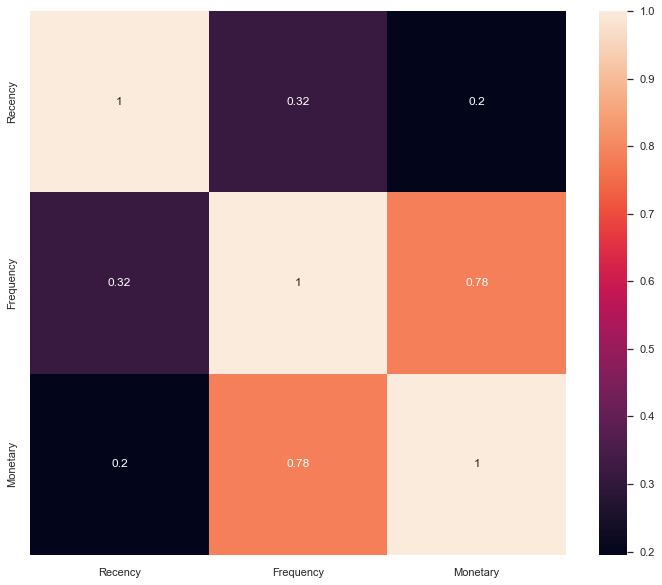

In [50]:
plt.figure(figsize=(12,10))
sns.heatmap(dfRFM.corr(), annot=True)

#### Key Observation(s): We could see positive correlation (0.78) between Frequency & Monetary

## 3. Clustering Models
 #### 1 RFM Score based Clustering
 #### 2 K-Means Algorithm based Clustering
 #### 3 Hirearchial Clustering

### 3.1 RFM Score based Clustering

#### Create functions to arrive at Quantiles for Recency, Frequency & Monetary

### 3.1.1 Assign Recency Score

In [51]:
# Function to classify the score for recency basis the quantiles 0.25, 0.50, 0.75, 0.90
# Assign high score for the shorter number of days from the last purchase 
# and low score for the longer days from the last purchase in the scale of 1-5 basis the quantile values

def ClassifyRecencyScore(days):
    QRecency = dfRFM["Recency"].quantile([0.25, 0.50, 0.75,0.90]).values 
    if days <= QRecency[0]:
        return 5
    elif days <= QRecency[1]:
        return 4
    elif days <= QRecency[2]:
        return 3
    elif days <= QRecency[3]:
        return 2
    else:
        return 1

In [52]:
print(dfRFM["Recency"].quantile([0.25, 0.50, 0.75, 0.90]).values)

[ 46. 185. 244. 244.]


In [53]:
dfRFM["RecencyScore"] = dfRFM["Recency"].apply(ClassifyRecencyScore)

### 3.1.2 Assign Frequency Score

In [54]:
# Function to classify the score for frequency basis the quantiles 0.25, 0.50, 0.75, 0.90
# Assign high score for the higher number of transactions 
# and low score for the lower number of transactions in the scale of 1-5 basis the quantile values
def ClassifyFrequencyScore(NoOfTransactions):
    QFrequency = dfRFM["Frequency"].quantile([0.25, 0.50, 0.75,0.90]).values 
    if NoOfTransactions <= QFrequency[0]:
        return 1
    elif NoOfTransactions <= QFrequency[1]:
        return 2
    elif NoOfTransactions <= QFrequency[2]:
        return 3
    elif NoOfTransactions <= QFrequency[3]:
        return 4
    else:
        return 5

In [55]:
print(dfRFM["Frequency"].quantile([0.25, 0.50, 0.75, 0.90]).values)

[ 11.   73.  320.  797.2]


#### Assign Frequency Score

In [56]:
dfRFM["FrequencyScore"] = dfRFM["Frequency"].apply(ClassifyFrequencyScore)

### 3.1.3 Assign Frequency Score

In [57]:
dfRFM['Monetary'].max()

622967643.17

In [58]:
# Function to classify the score for Monetary basis the quantiles 0.25, 0.50, 0.75, 0.90
# Assign high score for the high value of purchase 
# and low score for the low value of purchase in the scale of 1-5 basis the quantile values
def ClassifyMonetaryScore(PurchaseValue):
    QMonetary = dfRFM["Monetary"].quantile([0.25, 0.50, 0.75,0.90]).values 
    if PurchaseValue <= QMonetary[0]:
        return 1
    elif PurchaseValue <= QMonetary[1]:
        return 2
    elif PurchaseValue <= QMonetary[2]:
        return 3
    elif PurchaseValue <= QMonetary[3]:
        return 4
    else:
        return 5

In [59]:
print(dfRFM["Monetary"].quantile([0.25, 0.50, 0.75, 0.90]).values)

[   39649.58         699938.92        5163596.82       38275906.12199999]


#### Assign Monetary Score

In [60]:
dfRFM["MonetaryScore"] = dfRFM["Monetary"].apply(ClassifyMonetaryScore)

### 3.1.4 Create RFM score by concatenating the scores of Recency, Frequency & Monetary

In [61]:
dfRFM["RFMScoreConcatenated"] = dfRFM["RecencyScore"].astype("str") + dfRFM["FrequencyScore"].astype("str") + dfRFM["MonetaryScore"].astype("str")
dfRFM["RFMScoreConcatenated"] = dfRFM["RFMScoreConcatenated"].astype("int")
print("RFM Score unique values:", dfRFM["RFMScoreConcatenated"].nunique())
dfRFM["RFMScoreConcatenated"].head()

RFM Score unique values: 39


Prod_Category
Access Controller      422
Access Reader          421
Accessories            333
Accessories - Voice    513
Air Pods               435
Name: RFMScoreConcatenated, dtype: int32

Having 37 different segments using the concatenate method quickly becomes unwieldy for any practical use.
We will need a more concise way to define our segments.

### 3.1.5 Create RFM score by summing up the scores of Recency, Frequency & Monetary

In [62]:
dfRFM["RFMScoreSumTotal"] = dfRFM["RecencyScore"] + dfRFM["FrequencyScore"] + dfRFM["MonetaryScore"]
dfRFM["RFMScoreSumTotal"] = dfRFM["RFMScoreSumTotal"].astype("int")
print("RFM Score Summation unique values:", dfRFM["RFMScoreSumTotal"].nunique())
dfRFM["RFMScoreSumTotal"].head()

RFM Score Summation unique values: 10


Prod_Category
Access Controller       8
Access Reader           7
Accessories             9
Accessories - Voice     9
Air Pods               12
Name: RFMScoreSumTotal, dtype: int32

#### Key Observation(s): 
#### RFMScore created using concatenation of Recency, Frequency & Monetary Score has 37 unique values, whereas RFMScore created using summation of Recency, Frequency & Monetary Score has only 10 unique values. 
#### So lets considering the summation RFMScore for segmentation 

In [63]:
dfRFM.drop("RFMScoreConcatenated", axis=1, inplace=True)

In [64]:
dfRFM

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFMScoreSumTotal
Prod_Category,,,,,,,
Access Controller,183,27,"71,179.47",4,2,2,8
Access Reader,184,12,"13,198.69",4,2,1,7
Accessories,244,280,"1,126,525.48",3,3,3,9
Accessories - Voice,1,10,"1,343,679.20",5,1,3,9
Air Pods,185,137,"71,115,804.42",4,3,5,12
Airtag,185,23,"90,211.55",4,2,2,8
All In One PC,216,633,"34,293,050.49",3,4,4,11
Apple Accessories,244,680,"54,387,127.54",3,4,5,12
Apple Ipad (Tablets),244,798,"39,271,620.03",3,5,5,13


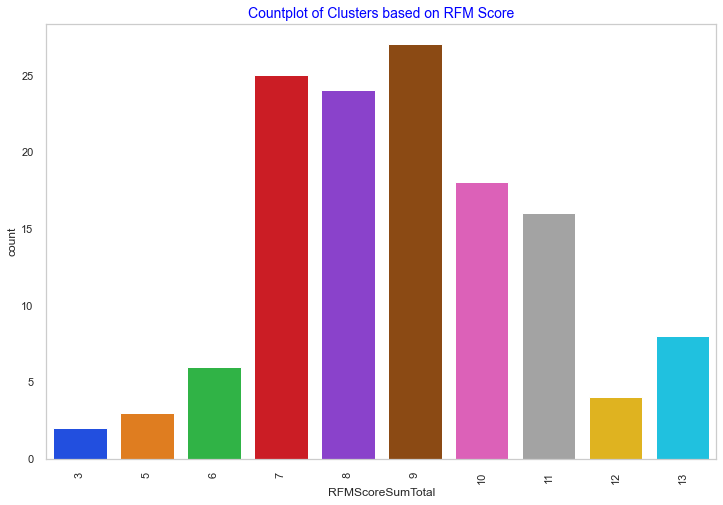

In [65]:
plt.figure(figsize=(12,8))
plt.title("Countplot of Clusters based on RFM Score", c="blue", size=14)
plt.xticks(rotation=90)
sns.set_theme(style="whitegrid")
sns.countplot(dfRFM["RFMScoreSumTotal"], palette="bright");

### 3.2 K-Means Clustering

#### Create Dataframe for Model building

In [66]:
dfModelRFM = dfRFM[['Recency', 'Frequency', 'Monetary']]
dfModelRFM.head()

,Recency,Frequency,Monetary
Prod_Category,,,
Access Controller,183,27,"71,179.47"
Access Reader,184,12,"13,198.69"
Accessories,244,280,"1,126,525.48"
Accessories - Voice,1,10,"1,343,679.20"
Air Pods,185,137,"71,115,804.42"


#### Analyze the Statistical Values in the dataset

In [67]:
dfModelRFM.describe()

,Recency,Frequency,Monetary
count,133.00,133.00,133.00
mean,156.28,385.60,"14,661,034.84"
std,99.40,969.72,"58,418,530.43"
min,1.00,1.00,324.00
25%,46.00,11.00,"39,649.58"
50%,185.00,73.00,"699,938.92"
75%,244.00,320.00,"5,163,596.82"
max,442.00,"7,386.00","622,967,643.17"


### 3.2.1 Normalize the Data in the columns Recency, Frequency & Monetary

In [68]:
Scaler = StandardScaler()
dfRFMScaled = Scaler.fit_transform(dfModelRFM)
dfRFMScaled = pd.DataFrame(dfRFMScaled, columns=["Recency", "Frequency", "Monetary"])

In [69]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# dfRFMScaled = scaler.fit_transform(dfModelRFM)
# dfRFMScaled = pd.DataFrame(dfRFMScaled, columns=["Recency", "Frequency", "Monetary"])

#### Analyze the Standarized Data

In [70]:
dfRFMScaled.describe()

,Recency,Frequency,Monetary
count,133.00,133.00,133.00
mean,0.00,0.00,-0.00
std,1.00,1.00,1.00
min,-1.57,-0.40,-0.25
25%,-1.11,-0.39,-0.25
50%,0.29,-0.32,-0.24
75%,0.89,-0.07,-0.16
max,2.89,7.25,10.45


#### Key Observation(s): We could see that the data is normalized 

### 3.2.2 Hopkins Statistics:
The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

- If the value is between {0.01, ...,0.3}, the data is regularly spaced.

- If the value is around 0.5, it is random.

- If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [71]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [72]:
#Use the Hopkins Statistic function by passing the dataframe as a paramter
hopkins(dfRFMScaled)

0.9918121713930351

#### Observation: Since the value of Hopkins Statistics is 0.97, its a clear indication that the data has high tendency to cluster

### 3.2.3 Identify Optimal Number of Clusters using [The Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering) 

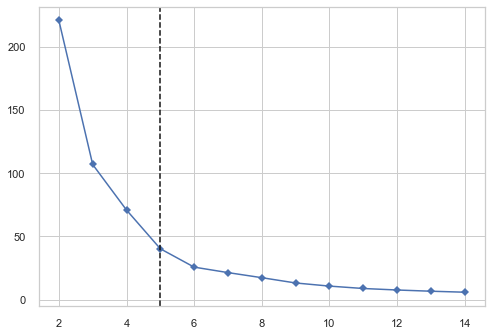

In [73]:
### Elbow Curve Analysis - Sum of Squared Distances
Model = KMeans()
visualizer = KElbowVisualizer(Model, k=(2,15), timings=False)
visualizer.fit(dfRFMScaled)
visualizer;

#### From the visualizer, optimal number of clusters is 5 and we can understand this from the various silhouette scores.

### 3.2.4 Identify Optimal number of Clusters using Silhouette Method

We will try different cluster numbers and check their [silhouette coefficient](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html). The silhouette coefficient for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar).

In [74]:
# Calculate the Silhouette_Score 
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(dfRFMScaled)
    sse_.append([k, silhouette_score(dfRFMScaled, kmeans.labels_)])
sse_

[[2, 0.8482626792620693],
 [3, 0.5917044869689096],
 [4, 0.6141200795751292],
 [5, 0.6181577633249729],
 [6, 0.5622788288936846],
 [7, 0.5578607992646675],
 [8, 0.5370788536493333],
 [9, 0.5540452519710781],
 [10, 0.542819114680103],
 [11, 0.5145332584531145],
 [12, 0.5332665648260232],
 [13, 0.5381326414340672],
 [14, 0.5412307264644625]]

#### From the Silhouette scores above, its evident that at k=5 the value is more

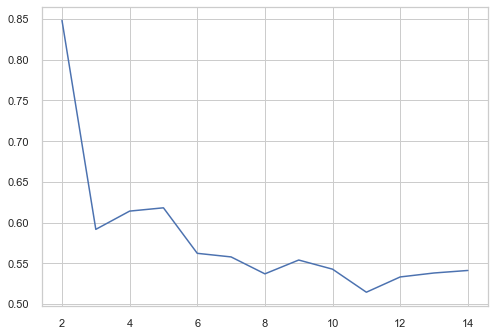

In [75]:
# Visualize the Silhouette Score using the plot
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

#### Key Observation(s): Silhoutte Score analysis shows that the optimal number of clusters at 5. 

### 3.2.5 K-Means Model Fitting

In [76]:
# Let us take the optimal cluster at 4 and fit the model.
kmeans = KMeans(n_clusters=5)
kmeans.fit(dfRFMScaled)

KMeans(n_clusters=5)

In [77]:
kmeans.labels_

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 4, 0, 0, 1, 0, 0, 4, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 4, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 4, 2, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 3, 0, 0, 0, 4,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 4, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 4, 4, 0, 0, 0, 4, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1])

In [78]:
dfModelRFM['KM_Cluster_ID']=kmeans.labels_

<AxesSubplot:xlabel='KM_Cluster_ID', ylabel='Recency'>

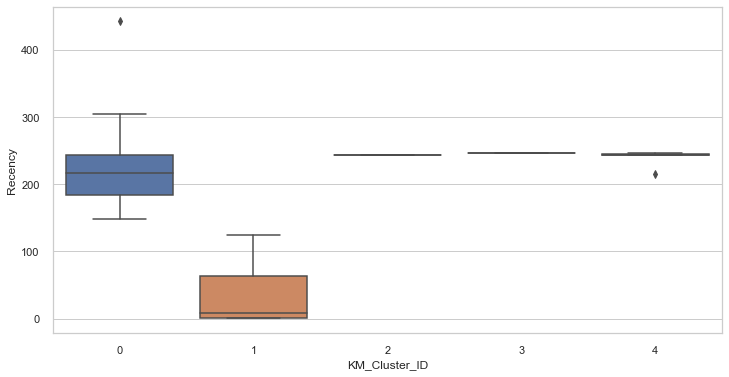

In [79]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
sns.boxplot(x="KM_Cluster_ID", y="Recency", data=dfModelRFM)

<AxesSubplot:xlabel='KM_Cluster_ID', ylabel='Frequency'>

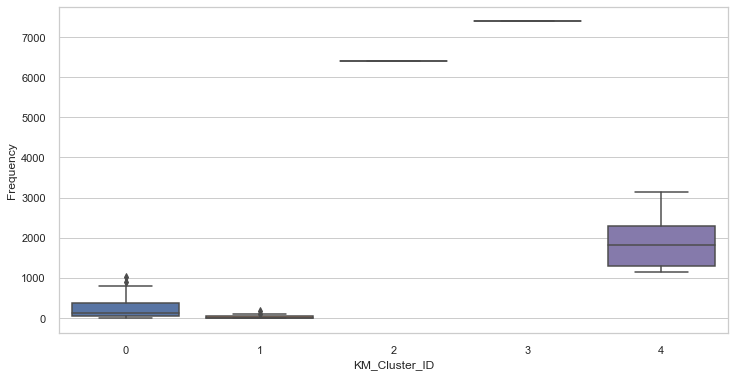

In [80]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
sns.boxplot(x="KM_Cluster_ID", y="Frequency", data=dfModelRFM)

<AxesSubplot:xlabel='KM_Cluster_ID', ylabel='Monetary'>

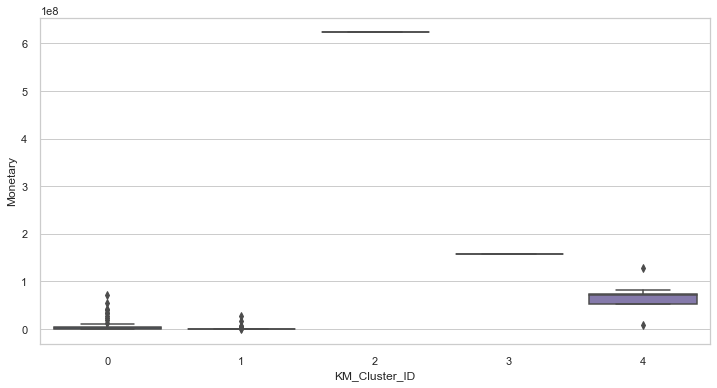

In [81]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
sns.boxplot(x="KM_Cluster_ID", y="Monetary", data=dfModelRFM)

<AxesSubplot:xlabel='KM_Cluster_ID', ylabel='Monetary'>

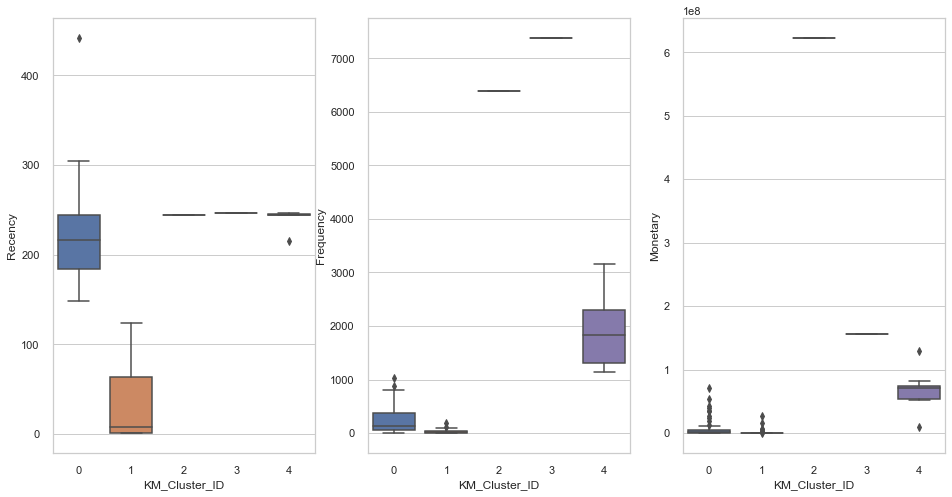

In [82]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,8))
sns.boxplot(x="KM_Cluster_ID", y="Recency", data=dfModelRFM, ax=ax[0])
sns.boxplot(x="KM_Cluster_ID", y="Frequency", data=dfModelRFM, ax=ax[1])
sns.boxplot(x="KM_Cluster_ID", y="Monetary", data=dfModelRFM, ax=ax[2])

#### Key Observation(s): <br>
Cluster 0 : Slow Movers : Cluster of product categories that have average recency and low turns <br>
Cluster 1 : New Entrants : Cluster of product categories that have below average recency, low turns <br>
Cluster 2 : Avg movers : Cluster of product categories that have average recency and above average turns <br>
Cluster 3 : Fast Movers : Cluster of product categories that have average recency and high turns <br>
Cluster 4 : Potential Non Movers : Cluster of product categories that have low recency and turns <br>

In [106]:
def ClassifyClusterLabel(ClusterID):
    if ClusterID == 0:
        return "Slow Movers"
    elif ClusterID == 1:
        return "New Entrants"
    elif ClusterID == 2:
        return "Avg Movers"
    elif ClusterID == 3:
        return "Fast Movers"
    else:
        return "Potential Non Movers"

In [107]:
dfModelRFM["KM_Cluster_Label"] = dfModelRFM["KM_Cluster_ID"].apply(ClassifyClusterLabel)

In [108]:
dfModelRFM

,Recency,Frequency,Monetary,KM_Cluster_ID,KM_Cluster_Label
Prod_Category,,,,,
Access Controller,183,27,"71,179.47",0,Slow Movers
Access Reader,184,12,"13,198.69",0,Slow Movers
Accessories,244,280,"1,126,525.48",0,Slow Movers
Accessories - Voice,1,10,"1,343,679.20",1,New Entrants
Air Pods,185,137,"71,115,804.42",0,Slow Movers
Airtag,185,23,"90,211.55",0,Slow Movers
All In One PC,216,633,"34,293,050.49",0,Slow Movers
Apple Accessories,244,680,"54,387,127.54",0,Slow Movers
Apple Ipad (Tablets),244,798,"39,271,620.03",0,Slow Movers


In [109]:
dfModelRFM['KM_Cluster_Label'].value_counts()

Slow Movers             75
New Entrants            47
Potential Non Movers     9
Avg Movers               1
Fast Movers              1
Name: KM_Cluster_Label, dtype: int64

In [110]:
# Calculate average values for each Cluster, and return a size of each segment 
Cluster_Label_agg = dfModelRFM.groupby('KM_Cluster_Label').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).round(1)
# Print the aggregated dataset
print(Cluster_Label_agg)

                     Recency Frequency       Monetary      
                        mean      mean           mean count
KM_Cluster_Label                                           
Avg Movers            244.00  6,393.00 622,967,643.20     1
Fast Movers           246.00  7,386.00 156,795,531.40     1
New Entrants           35.00     27.60   1,409,074.00    47
Potential Non Movers  241.30  1,947.80  67,563,855.00     9
Slow Movers           219.70    249.00   6,611,377.10    75


### Visualize the Clusters for numbers of Product Categories

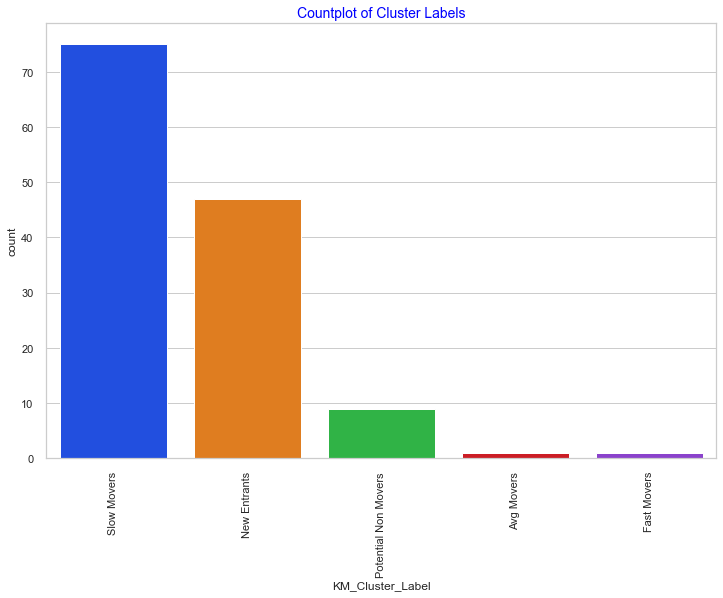

In [111]:
plt.figure(figsize=(12,8))
plt.title("Countplot of Cluster Labels", c="blue", size=14)
plt.xticks(rotation=90)
sns.set_theme(style="whitegrid")
sns.countplot(dfModelRFM["KM_Cluster_Label"], palette="bright");

### Observations & Recommendations:<br>
<b>Potential Non Movers:</b> <br>
<b>Observations:</b> Category of products that have no recent sales, low number of orders and below average monetary value <br>
<b>Recommendations:</b> Can be stored at the farthest location; indicate to the business for appropriate action like discounting or write-off to clear the space <br><br>

<b>Slow Movers:</b> <br>
<b>Observations:</b> Category of products that have low number of orders, low recency and low monetary value  <br>
<b>Recommendations:</b> Can be stored at the farthest location after accomodating Potential Non Movers; indicate to the business for appropriate action like discounting to improve traction <br><br>

<b>Mid Movers:</b><br>
<b>Observations: </b> This category of product have average turn over but high monetary value <br>
<b>Recommendations:</b> Store them between the New Entrants and Slow movers category <br><br>

<b>New Entrants:</b><br>
<b>Observations:</b> New category of product with good focus from business <br>
<b>Recommendations:</b> Typical for the IT products business, as there will be new variants launched with limited past history. This category can be stored closer to access, post allocating space for the Fast movers <br><br>

<b>Fast Movers:</b><br>
<b>Observations:</b> Category with high rotation and average monetary value <br>
<b>Recommendations:</b> Commands the premium access space for immediate storage and retrieval <br><br>

### Overall Concustion
The IT / Electronics producsts distribution business has multiple new categories with limited past history. This needs a new approach for inventory classification and traditional ABC analysis might not always provide optimal results from Warehouse management percepective. </br>

Based on the K-Means clustering following is the inference </br>
Slow Movers          : 75 or 56% </br>
New Entrants         : 47 or 35% </br>
Potential Non Movers :	9 or 7% </br>
Avg Movers	         :  1 or 1% </br>
Fast Movers	         :  1 or 1% </br>

In [113]:
Cluster_Label_agg

,RecencyMean,FrequencyMean,MonetaryMean,Count
KM_Cluster_Label,,,,
Avg Movers,244.00,"6,393.00","622,967,643.20",1
Fast Movers,246.00,"7,386.00","156,795,531.40",1
New Entrants,35.00,27.60,"1,409,074.00",47
Potential Non Movers,241.30,"1,947.80","67,563,855.00",9
Slow Movers,219.70,249.00,"6,611,377.10",75


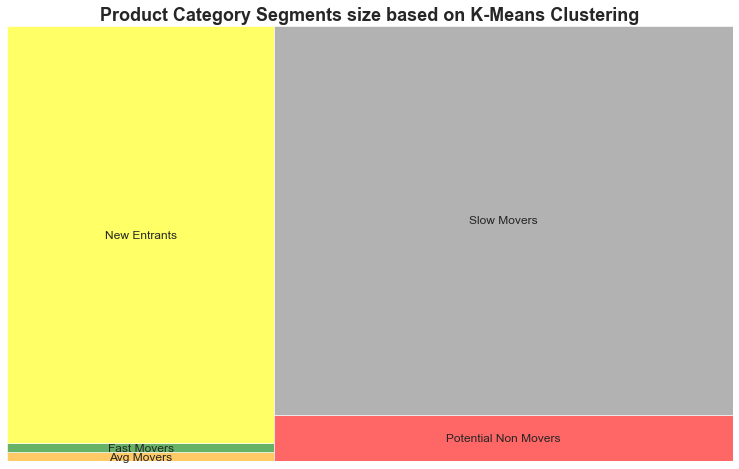

In [115]:
# Cluster_Label_agg.columns = Cluster_Label_agg.columns.droplevel()
Cluster_Label_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
#Create our plot and resize it.
import squarify
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(13, 8)
squarify.plot(sizes=Cluster_Label_agg['Count'], 
              label=['Avg Movers',
                     'Fast Movers',
                     'New Entrants',
                     'Potential Non Movers',
                     'Slow Movers'], color=["orange",'green',"yellow","red","grey"], alpha=.6 )
plt.title("Product Category Segments size based on K-Means Clustering",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

### 3.3 Hierarchical Clustering

In [90]:
# Create dataframe for HC Model
dfModelRFMHierarchy = dfRFM[['Recency', 'Frequency', 'Monetary']]
dfModelRFMHierarchy.head()

,Recency,Frequency,Monetary
Prod_Category,,,
Access Controller,183,27,"71,179.47"
Access Reader,184,12,"13,198.69"
Accessories,244,280,"1,126,525.48"
Accessories - Voice,1,10,"1,343,679.20"
Air Pods,185,137,"71,115,804.42"


#### Analyze the Statistical Values in the dataset

In [91]:
dfModelRFMHierarchy.describe()

,Recency,Frequency,Monetary
count,133.00,133.00,133.00
mean,156.28,385.60,"14,661,034.84"
std,99.40,969.72,"58,418,530.43"
min,1.00,1.00,324.00
25%,46.00,11.00,"39,649.58"
50%,185.00,73.00,"699,938.92"
75%,244.00,320.00,"5,163,596.82"
max,442.00,"7,386.00","622,967,643.17"


### 3.3.1 Normalize the Data in the columns Recency, Frequency & Monetary

In [92]:
Scaler = StandardScaler()
dfRFMScaledHierarchy = Scaler.fit_transform(dfModelRFMHierarchy)
dfRFMScaledHierarchy = pd.DataFrame(dfRFMScaledHierarchy, columns=["Recency", "Frequency", "Monetary"])

#### Analyze the Standardized Data

In [93]:
dfRFMScaledHierarchy.describe()

,Recency,Frequency,Monetary
count,133.00,133.00,133.00
mean,0.00,0.00,-0.00
std,1.00,1.00,1.00
min,-1.57,-0.40,-0.25
25%,-1.11,-0.39,-0.25
50%,0.29,-0.32,-0.24
75%,0.89,-0.07,-0.16
max,2.89,7.25,10.45


#### Key Observation(s): We could see that the data is normalized 

### 3.3.2 Hierarchical Clustering Implementation - Method Single

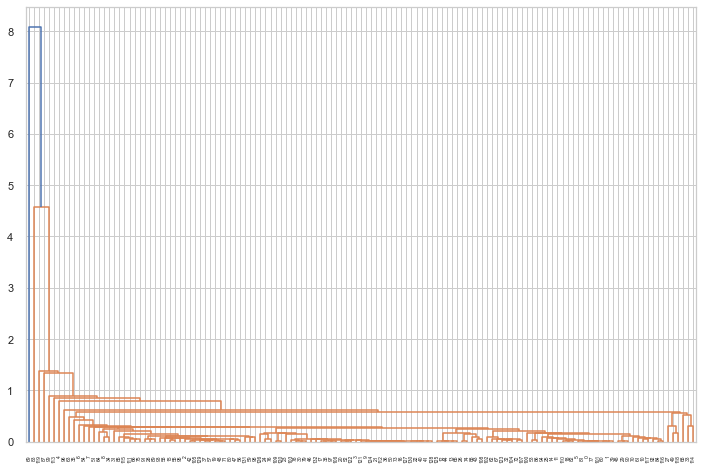

In [94]:
fig = plt.figure(figsize = (12,8))
Mergings = linkage(dfRFMScaledHierarchy, method = "single", metric='euclidean')
dendrogram(Mergings)
plt.show()

#### Key Observation(s): From the above visualization, by using single method heirarchical clustering, the clusters are not very clear, hence let us perform complete heirarchical clustering method to see the clusters.

### 3.3.2 Hierarchical Clustering Implementation - Method Complete

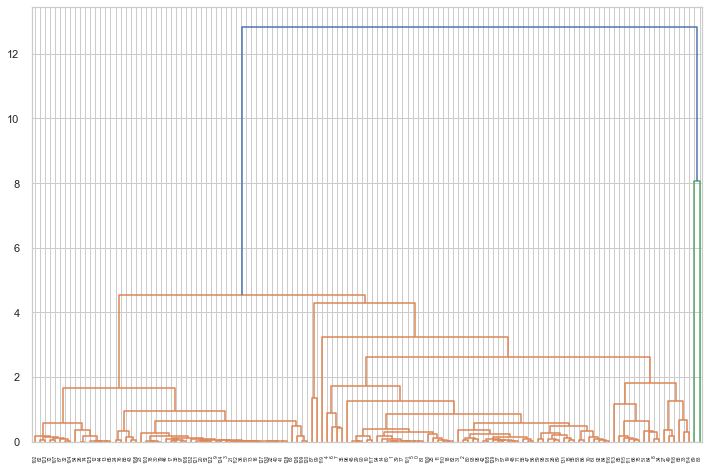

In [95]:
# heirarchical clustering with complete linkage method and using Dendrogram
fig = plt.figure(figsize = (12,8))
Mergings = linkage(dfRFMScaledHierarchy, method = "complete", metric='euclidean')
dendrogram(Mergings)
plt.show()

In [96]:
# 5 clusters
cut_tree(Mergings, n_clusters=5).shape

(133, 1)

In [97]:
HC_Cluster_IDs = cut_tree(Mergings, n_clusters=5).reshape(-1, )
HC_Cluster_IDs

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 2, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 3, 0, 0, 0, 4,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 4, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1])

In [98]:
# assign cluster labels
dfModelRFMHierarchy['HC_Cluster_ID'] = HC_Cluster_IDs

<AxesSubplot:xlabel='HC_Cluster_ID', ylabel='Monetary'>

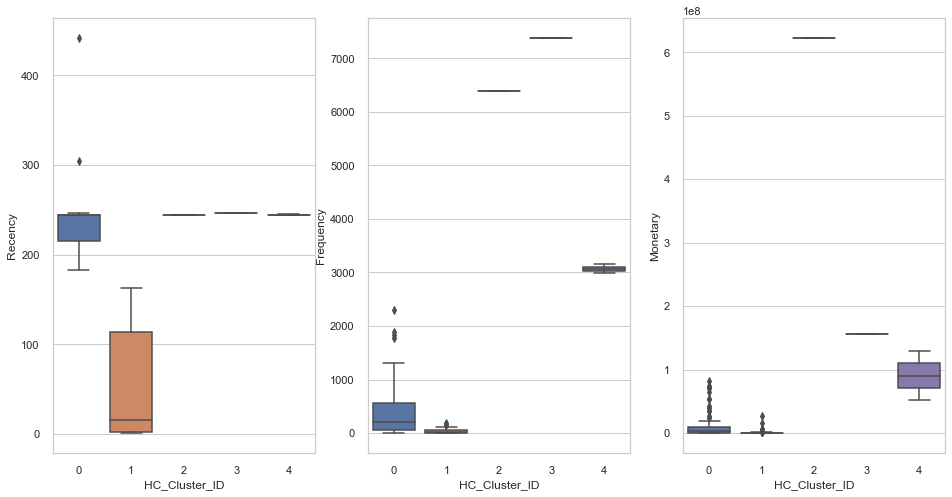

In [99]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,8))
sns.boxplot(x="HC_Cluster_ID", y="Recency", data=dfModelRFMHierarchy, ax=ax[0])
sns.boxplot(x="HC_Cluster_ID", y="Frequency", data=dfModelRFMHierarchy, ax=ax[1])
sns.boxplot(x="HC_Cluster_ID", y="Monetary", data=dfModelRFMHierarchy, ax=ax[2])

#### Key Observation(s): <br>
Cluster 0 : Slow Movers : Cluster of product categories that have average recency and low turns <br>
Cluster 1 : New Entrants : Cluster of product categories that have below average recency, low turns <br>
Cluster 2 : Avg movers : Cluster of product categories that have average recency and above average turns <br>
Cluster 3 : Fast Movers : Cluster of product categories that have average recency and high turns <br>
Cluster 4 : Potential Non Movers : Cluster of product categories that have low recency and turns <br>

In [118]:
def ClassifyHClusterLabel(ClusterID):
    if ClusterID == 4:
        return "Potential Non Movers"
    elif ClusterID == 3:
        return "Fast Movers"
    elif ClusterID == 2:
        return "Avg Movers"
    elif ClusterID == 1:
        return "New Entrants"
    else:
        return "Slow Movers"

In [119]:
dfModelRFMHierarchy["HC_Cluster_Label"] = dfModelRFMHierarchy["HC_Cluster_ID"].apply(ClassifyHClusterLabel)

In [120]:
dfModelRFMHierarchy['HC_Cluster_Label'].value_counts()

Slow Movers             74
New Entrants            55
Potential Non Movers     2
Avg Movers               1
Fast Movers              1
Name: HC_Cluster_Label, dtype: int64

In [121]:
dfModelRFMHierarchy

,Recency,Frequency,Monetary,HC_Cluster_ID,HC_Cluster_Label
Prod_Category,,,,,
Access Controller,183,27,"71,179.47",0,Slow Movers
Access Reader,184,12,"13,198.69",0,Slow Movers
Accessories,244,280,"1,126,525.48",0,Slow Movers
Accessories - Voice,1,10,"1,343,679.20",1,New Entrants
Air Pods,185,137,"71,115,804.42",0,Slow Movers
Airtag,185,23,"90,211.55",0,Slow Movers
All In One PC,216,633,"34,293,050.49",0,Slow Movers
Apple Accessories,244,680,"54,387,127.54",0,Slow Movers
Apple Ipad (Tablets),244,798,"39,271,620.03",0,Slow Movers


In [123]:
# Calculate average values for each Cluster, and return a size of each segment 
HC_Cluster_Label_agg = dfModelRFMHierarchy.groupby('HC_Cluster_Label').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).round(1)
# Print the aggregated dataset
print(HC_Cluster_Label_agg)

                     Recency Frequency       Monetary      
                        mean      mean           mean count
HC_Cluster_Label                                           
Avg Movers            244.00  6,393.00 622,967,643.20     1
Fast Movers           246.00  7,386.00 156,795,531.40     1
New Entrants           52.30     32.90   1,370,180.30    55
Potential Non Movers  244.50  3,066.50  90,283,039.50     2
Slow Movers           228.70    399.50  12,354,438.70    74


### Visualize the Clusters for numbers of Product Categories

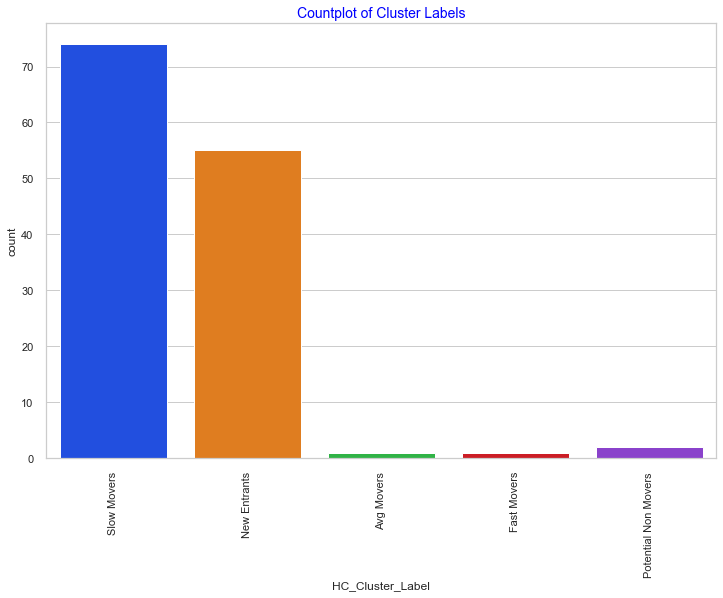

In [124]:
plt.figure(figsize=(12,8))
plt.title("Countplot of Cluster Labels", c="blue", size=14)
plt.xticks(rotation=90)
sns.set_theme(style="whitegrid")
sns.countplot(dfModelRFMHierarchy["HC_Cluster_Label"], palette="bright");

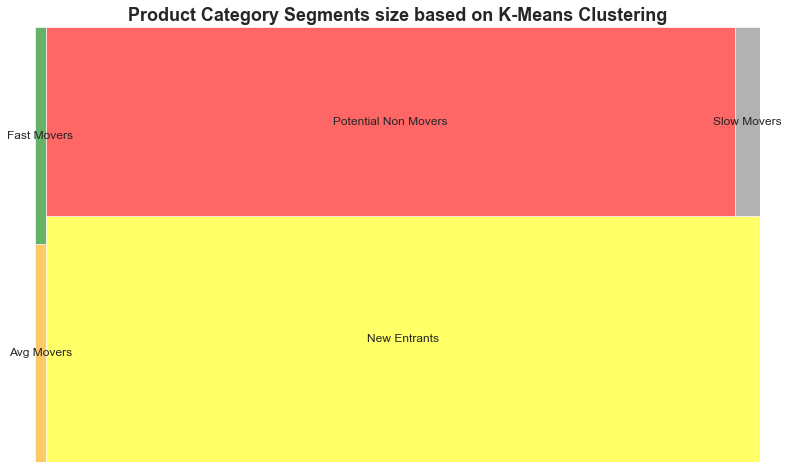

In [116]:
# Cluster_Label_agg.columns = Cluster_Label_agg.columns.droplevel()
HC_Cluster_Label_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(13, 8)
squarify.plot(sizes=HC_Cluster_Label_agg['Count'], 
              label=['Avg Movers',
                     'Fast Movers',
                     'New Entrants',
                     'Potential Non Movers',
                     'Slow Movers'], color=["orange",'green',"yellow","red","grey"], alpha=.6 )
plt.title("Product Category Segments size based on Hierarchical Clustering",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

## Conclusion

### Its observed that there is close similariy between both the K-Means and Hierarchical Clustering models.
### Considering the sturctured approach in arriving at the number of clusters and easy interpretability, we can continue using K-Means algorithm for clsutering Product categories